In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

In [2]:
# Import data
data = pd.read_excel('Base Model_2019_ML_Ashiqur.xlsx', sheet_name='Base Model')

print(data.head())

   Bridge_Number  Steel_Element         CS1  CS2       CS3  CS4  temp_dp_2m  \
0          10029             28  100.000000  0.0  0.000000  0.0     19.6859   
1          10029             29   92.592593  0.0  7.407407  0.0     19.6859   
2          10029            107   99.725746  0.0  0.274254  0.0     19.6859   
3          10029            113   97.397066  0.0  2.602934  0.0     19.6859   
4          10029            152   98.630137  0.0  1.369863  0.0     19.6859   

   avg_rh_2m  temp_a_10m  temp_a_2m    ...      DECK_STRUCTURE_TYPE_107  \
0  82.387398      22.962    23.2285    ...                            1   
1  82.387398      22.962    23.2285    ...                            1   
2  82.387398      22.962    23.2285    ...                            1   
3  82.387398      22.962    23.2285    ...                            1   
4  82.387398      22.962    23.2285    ...                            1   

   SURFACE_TYPE_108A  MEMBRANE_TYPE_108B  DECK_PROTECTION_108C  \
0       

In [3]:
data = data[data['Steel_Element'] == 107] 
data = data.reset_index(drop=True) 
env_nbe_nbi_df = data[[
#     'CS1', 'CS2', 'CS3', 'CS4',
       'temp_dp_2m', 'avg_rh_2m', 'temp_a_10m', 'temp_a_2m', 'temp_a_60c',
       'temp_s_2cm', 'ppt_2019', 'hplus_2019', 'SO4_2019', 'Cl_2019',
       'totalN_201', 'NO3_2019', 'NH4_2019', 'Na_2019', 'K_2019', 'Mg_2019',
       'Ca_2019', 'MAINTENANCE_021', 'Bridge_Age', 'ADT_029',
       'DEGREES_SKEW_034', 'SERVICE_ON_042A', 'SERVICE_UND_042B',
       'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_044A',
       'APPR_TYPE_044B', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
       'SUBSTRUCTURE_COND_060', 'OPERATING_RATING_064', 'INVENTORY_RATING_066',
       'STRUCTURAL_EVAL_067', 'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107',
       'SURFACE_TYPE_108A', 'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C',
       'PERCENT_ADT_TRUCK_109','BRIDGE_CONDITION','Label_CS1','Label_CS2','Label_CS3','Label_CS4']]
print(env_nbe_nbi_df)

     temp_dp_2m  avg_rh_2m  temp_a_10m  temp_a_2m  temp_a_60c  temp_s_2cm  \
0     19.685900  82.387398   22.962000  23.228500   22.967199   24.785700   
1     19.520201  81.922302   22.861601  23.176001   23.084700   25.084900   
2     19.512199  81.895698   22.860599  23.174499   23.095200   25.107700   
3     19.610500  82.171501   22.911200  23.205400   23.012699   24.918699   
4     19.602301  82.149002   22.905600  23.202700   23.018900   24.933300   
5     19.543699  82.028999   22.860701  23.173500   23.041100   24.979799   
6     19.563499  82.081001   22.871901  23.180799   23.028700   24.949400   
7     19.512199  81.895698   22.860599  23.174499   23.095200   25.107700   
8     19.497801  81.902901   22.844900  23.157600   23.077400   25.061001   
9     19.505800  81.872101   22.861200  23.173800   23.105400   25.130100   
10    19.502899  81.900703   22.850500  23.163500   23.082800   25.076599   
11    19.597000  82.128197   22.903601  23.202299   23.023300   24.948999   

In [4]:
env_nbe_nbi_df.head()

,temp_dp_2m,avg_rh_2m,temp_a_10m,temp_a_2m,temp_a_60c,temp_s_2cm,ppt_2019,hplus_2019,SO4_2019,Cl_2019,...,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,BRIDGE_CONDITION,Label_CS1,Label_CS2,Label_CS3,Label_CS4
0,19.685900,82.387398,22.962000,23.228500,22.967199,24.785700,144.593002,0.118370,6.12682,7.79553,...,1,0,0,0,5,1,1,0,0,0
1,19.520201,81.922302,22.861601,23.176001,23.084700,25.084900,144.490005,0.117853,6.16344,8.01924,...,1,0,0,0,2,1,1,0,0,0
2,19.512199,81.895698,22.860599,23.174499,23.095200,25.107700,144.483993,0.117803,6.16788,8.04684,...,1,1,0,0,7,2,0,0,0,1
3,19.610500,82.171501,22.911200,23.205400,23.012699,24.918699,144.585007,0.118218,6.14559,7.92248,...,1,0,0,0,2,1,0,0,0,1
4,19.602301,82.149002,22.905600,23.202700,23.018900,24.933300,144.567001,0.118165,6.14710,7.92923,...,1,0,0,0,2,2,1,0,0,0


In [5]:
dataset = env_nbe_nbi_df.values
bridge_data = dataset[:,:-4]

cs1_label = dataset[:,-4]
cs2_label = dataset[:,-3]
cs3_label = dataset[:,-2]
cs4_label = dataset[:,-1]

In [6]:
env_nbe_nbi_df.columns
feature_columns = ['temp_dp_2m', 'avg_rh_2m', 'temp_a_10m', 'temp_a_2m', 'temp_a_60c',
       'temp_s_2cm', 'ppt_2019', 'hplus_2019', 'SO4_2019', 'Cl_2019',
       'totalN_201', 'NO3_2019', 'NH4_2019', 'Na_2019', 'K_2019', 'Mg_2019',
       'Ca_2019', 'MAINTENANCE_021', 'Bridge_Age', 'ADT_029',
       'DEGREES_SKEW_034', 'SERVICE_ON_042A', 'SERVICE_UND_042B',
       'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_044A',
       'APPR_TYPE_044B', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
       'SUBSTRUCTURE_COND_060', 'OPERATING_RATING_064', 'INVENTORY_RATING_066',
       'STRUCTURAL_EVAL_067', 'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107',
       'SURFACE_TYPE_108A', 'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C',
       'PERCENT_ADT_TRUCK_109','BRIDGE_CONDITION']

In [7]:
bridge_data

array([[19.6858997, 82.3873978, 22.9619999, ...,  0.       ,  5.       ,
         1.       ],
       [19.5202007, 81.9223022, 22.8616009, ...,  0.       ,  2.       ,
         1.       ],
       [19.5121994, 81.8956985, 22.8605995, ...,  0.       ,  7.       ,
         2.       ],
       ...,
       [19.5531998, 83.0761032, 22.9790993, ...,  0.       , 15.       ,
         2.       ],
       [19.5531998, 83.0761032, 22.9790993, ...,  0.       , 14.       ,
         2.       ],
       [19.5856991, 83.1405029, 22.9715004, ...,  8.       , 14.       ,
         2.       ]])

In [8]:
cs1_label

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [9]:
len(cs1_label)

970

# Model Training

kernel='linear'
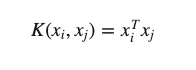

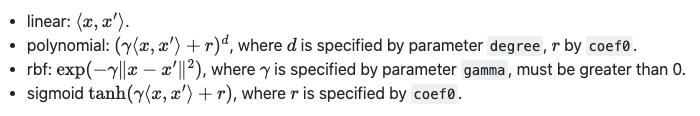

## CS1

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [11]:
X_train, X_test, y_train, y_test = train_test_split(bridge_data, cs1_label, test_size=0.3,random_state=109)
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
y_pred = clf.predict(X_test)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7800687285223368


In [14]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9117647058823529


## CS2

In [15]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(bridge_data, cs2_label, test_size=0.3,random_state=109)
clf2 = SVC(kernel='linear')
clf2.fit(X_train2, y_train2)

SVC(kernel='linear')

In [16]:
y_pred2 = clf2.predict(X_test2)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8797250859106529


In [18]:
print("Recall:",metrics.recall_score(y_test2, y_pred2))

Recall: 0.037037037037037035


In [19]:
y_test2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0.

In [20]:
y_pred2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

## CS3

In [21]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(bridge_data, cs3_label, test_size=0.3,random_state=109)
clf3 = SVC(kernel='linear')
clf3.fit(X_train3, y_train3)

SVC(kernel='linear')

In [22]:
y_pred3 = clf3.predict(X_test3)

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9484536082474226


In [24]:
print("Recall:",metrics.recall_score(y_test3, y_pred3))

Recall: 0.18181818181818182


In [25]:
y_test3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
y_pred3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## CS4

In [27]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(bridge_data, cs4_label, test_size=0.3,random_state=109)
clf4 = SVC(kernel='linear')
clf4.fit(X_train4, y_train4)

SVC(kernel='linear')

In [28]:
y_pred4 = clf4.predict(X_test4)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.9553264604810997


In [30]:
print("Recall:",metrics.recall_score(y_test4, y_pred4))

Recall: 0.1111111111111111


In [31]:
y_test4

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
y_pred4

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.